# T-test:
T-test are two types:

1. one sample T-test
2. two sample T-test are two types
                             1. paied t-test(dependenat t-test)
                             2. unpaid t-test(independent t-test)
    



In [29]:
import researchpy as rp
from scipy import stats
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\Iris_Data.csv")

In [31]:
df.shape

(150, 5)

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
#show descriptive statistics from pandas.describe()
df.groupby("species")["sepal_width"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [34]:
rp.summary_cont(df.groupby("species")["sepal_width"])

,N,Mean,SD,SE,95% Conf.,Interval
species,,,,,,
Iris-setosa,50,3.418,0.381024,0.053885,3.311313,3.524687
Iris-versicolor,50,2.770,0.313798,0.044378,2.682136,2.857864
Iris-virginica,50,2.974,0.322497,0.045608,2.883701,3.064299


In [35]:
setosa = df[(df["species"]=="Iris-setosa")]
setosa.reset_index(inplace=True)

versicolor = df[(df["species"]=="Iris-versicolor")]
versicolor.reset_index(inplace=True)

In [36]:
setosa.shape

(50, 6)

In [37]:
versicolor.shape

(50, 6)

In [38]:
#Assumption check
#Homogeneity of variance:  levene is the hypothesis method

In [39]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

# Normal distribution

In [40]:
diff = setosa['sepal_width']-versicolor['sepal_width']

In [41]:
import matplotlib.pyplot as plt

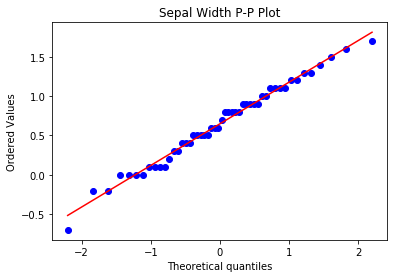

In [42]:
stats.probplot(diff, plot=plt)
plt.title('Sepal Width P-P Plot')
plt.savefig('Sepal Width Residuals.png')

Text(0, 0.5, 'Residuals Plot of Sepal Width.png')

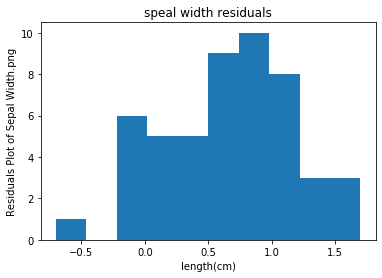

In [43]:
diff.plot(kind='hist',title='speal width residuals')
plt.xlabel('length(cm)')
plt.ylabel('Residuals Plot of Sepal Width.png')

In [44]:
#what are the difference to check the normal distibution
#qqplot, hist, pplot, shapario

In [46]:
stats.shapiro(diff) #

(0.9859335422515869, 0.8108891248703003)

In [47]:
diff.skew()

-0.17386802479248675

# un-paid/Independent T-test

In [48]:
stats.ttest_ind(setosa['sepal_width'],versicolor['sepal_width'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)